In [198]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [97]:
df = pd.read_csv("MagicBricks.csv")

In [98]:
#Heading of the data
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [99]:
#total number of row and coloumn
df.shape

(1259, 11)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [101]:
#number of catagorical features
loc = df['Locality'].unique()
print('Number of BHK =',df['BHK'].unique())
print('Number of Bathroom =',df['Bathroom'].unique())
print('Number of Furnishing =',df['Furnishing'].unique())
print('Number of Locality =',len(loc))
print('Number of Parking =',df['Parking'].unique())
print('Number of Status =',df['Status'].unique())
print('Number of Transaction =',df['Transaction'].unique())
print('Number of Type =',df['Type'].unique())


Number of BHK = [ 3  2  4  1  6  5  7 10]
Number of Bathroom = [ 2.  3.  4.  1. nan  5.  6.  7.]
Number of Furnishing = ['Semi-Furnished' 'Furnished' 'Unfurnished' nan]
Number of Locality = 365
Number of Parking = [  1.   5.   2.  nan   4.   9.   3.  39.  10. 114.]
Number of Status = ['Ready_to_move' 'Almost_ready']
Number of Transaction = ['New_Property' 'Resale']
Number of Type = ['Builder_Floor' 'Apartment' nan]


In [102]:
#descriptive analysis
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


# Exploratory Data Analysis

In [103]:
#data analysis for area as area is the most important feature regarding to house pricing
df['Area'].value_counts()

900.0      67
1500.0     50
1800.0     48
1000.0     42
1600.0     38
           ..
530.0       1
972.0       1
324.0       1
4800.0      1
11050.0     1
Name: Area, Length: 315, dtype: int64

C:\Users\Karan Singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


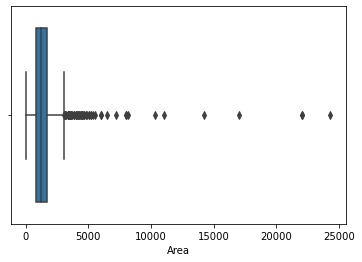

In [104]:
sns.boxplot(df['Area'])
plt.show()

C:\Users\Karan Singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Area', ylabel='Price'>

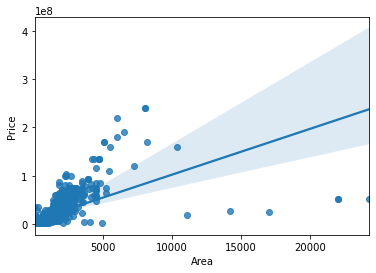

In [105]:
sns.regplot(df['Area'],df['Price'])

### Area below 3000 sqft. is more frequent

C:\Users\Karan Singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BHK', ylabel='count'>

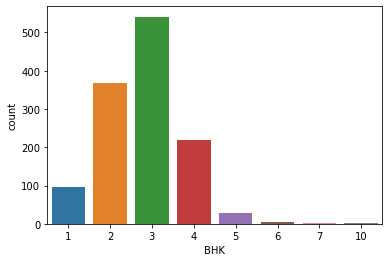

In [106]:
sns.countplot(df['BHK'])

<AxesSubplot:xlabel='Price', ylabel='BHK'>

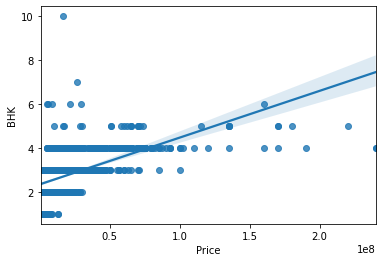

In [107]:
sns.regplot(y='BHK',x='Price',data=df)

### Significane of BHK above 5 is less with price

In [108]:
df['Bathroom'].value_counts()

2.0    551
3.0    355
1.0    146
4.0    138
5.0     57
6.0      7
7.0      3
Name: Bathroom, dtype: int64

<AxesSubplot:xlabel='Price', ylabel='Bathroom'>

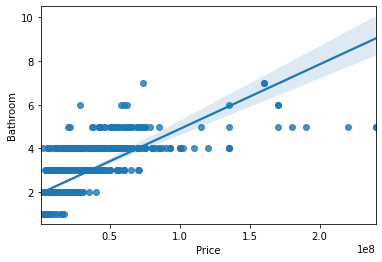

In [109]:
sns.regplot(y='Bathroom',x='Price',data=df)

C:\Users\Karan Singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bathroom', ylabel='count'>

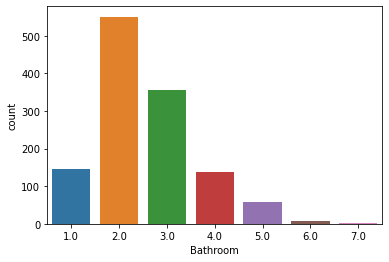

In [110]:
sns.countplot(df["Bathroom"])

### Most used number of bathroom in demand seems to be 5

C:\Users\Karan Singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parking', ylabel='count'>

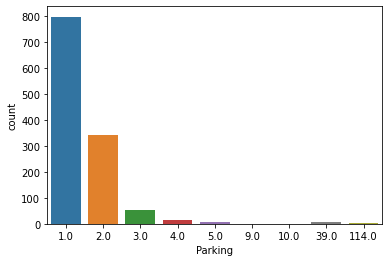

In [111]:
sns.countplot(df['Parking'])

### Parking mostly need is 1 and 2

# Analysing the catagorical feature

In [112]:
df['Transaction'].value_counts()

Resale          781
New_Property    478
Name: Transaction, dtype: int64

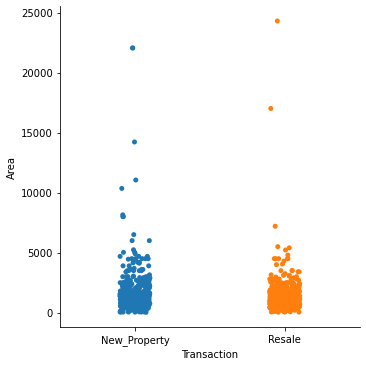

In [113]:
sns.catplot(x="Transaction", y="Area", data=df)


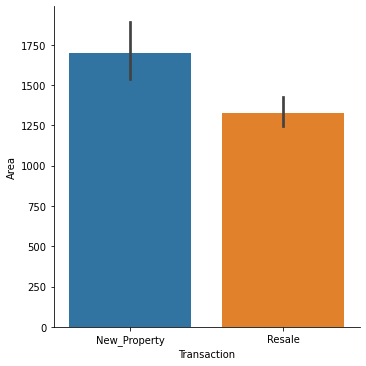

In [114]:
sns.catplot(x="Transaction", y="Area", kind="bar", data=df)

### Area is the biggest factor to predict price, as we all know. And seemingly Box Plot is a better way to understand the distribution of these Catagorical Data over Area. These plots as well say that MAX of Area is around 2500 sqft.

In [115]:
df['Status'].value_counts()

Ready_to_move    1184
Almost_ready       75
Name: Status, dtype: int64

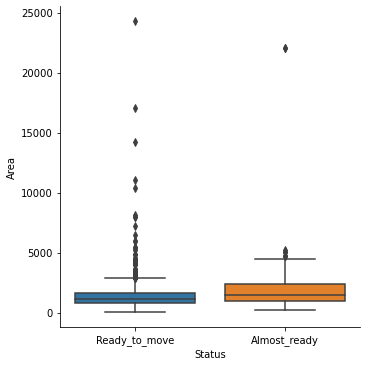

In [116]:
sns.catplot(x="Status", y="Area", kind="box", data=df)

In [117]:
df['Furnishing'].value_counts()

Semi-Furnished    708
Unfurnished       363
Furnished         183
Name: Furnishing, dtype: int64

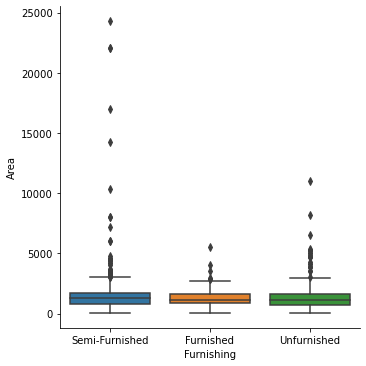

In [118]:
sns.catplot(x="Furnishing", y="Area", kind="box", data=df)


In [119]:
df['Type'].value_counts()

Builder_Floor    661
Apartment        593
Name: Type, dtype: int64

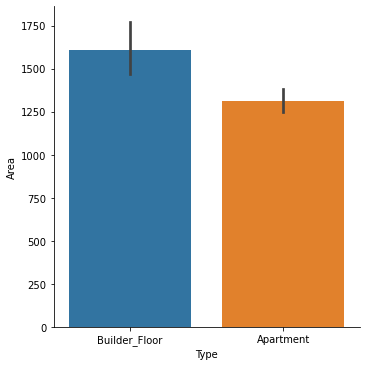

In [120]:
sns.catplot(x="Type", y="Area", kind="bar", data=df)

In [121]:
df['Locality'].value_counts()

Lajpat Nagar 3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            34
Lajpat Naga

### Lots of catagory in locality around 365

### >>Filltering the dataset

In [122]:
area_df=df['Area'].value_counts().head(40)
# Areas that occured atleast 10 times are taken:--

area_df

900.0     67
1500.0    50
1800.0    48
1000.0    42
1600.0    38
1350.0    35
1100.0    32
1400.0    30
450.0     29
1200.0    28
1700.0    26
1300.0    25
800.0     25
850.0     21
750.0     21
950.0     19
1150.0    18
540.0     17
1450.0    16
700.0     15
810.0     15
500.0     14
1250.0    14
2000.0    13
600.0     12
720.0     11
1550.0    11
1050.0    11
350.0     10
2700.0    10
550.0     10
2250.0    10
650.0     10
4500.0    10
405.0     10
2200.0    10
675.0      9
990.0      8
1650.0     8
2100.0     8
Name: Area, dtype: int64

C:\Users\Karan Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Area', ylabel='Density'>

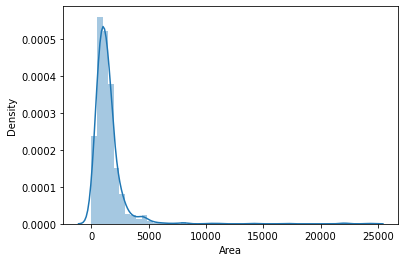

In [123]:
#filltering the area coloumn
sns.distplot(df['Area'])

(array([1.133e+03, 1.050e+02, 1.100e+01, 3.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 3.000e+00]),
 array([   28. ,  2455.2,  4882.4,  7309.6,  9736.8, 12164. , 14591.2,
        17018.4, 19445.6, 21872.8, 24300. ]),
 <BarContainer object of 10 artists>)

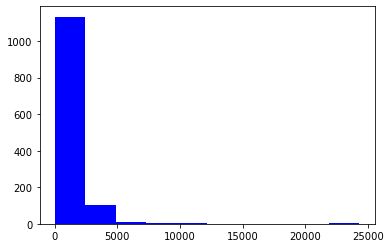

In [124]:
plt.hist(df["Area"],color='blue')

### Lets decide the area = 3000 

In [125]:
df=df[df['Area']<=3000]

<AxesSubplot:xlabel='Price', ylabel='Area'>

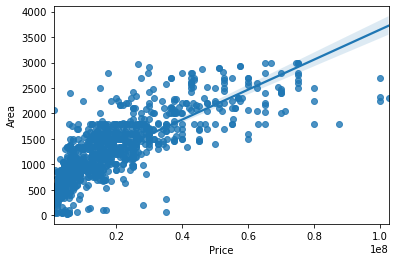

In [126]:
sns.regplot(y='Area',x='Price',data=df)

In [127]:
df=df[df['BHK']<6]

In [128]:
df=df[~(df['Bathroom']==6)]

In [129]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [130]:
df.shape


(1181, 11)

In [131]:
cor=df.corr()

In [132]:
cor

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
Area,1.000000,0.736270,0.792406,-0.038374,0.796127,0.139027
BHK,0.736270,1.000000,0.751536,-0.088360,0.594771,0.134648
Bathroom,0.792406,0.751536,1.000000,-0.047850,0.742585,0.151435
Parking,-0.038374,-0.088360,-0.047850,1.000000,-0.020703,-0.019978
Price,0.796127,0.594771,0.742585,-0.020703,1.000000,0.267190
Per_Sqft,0.139027,0.134648,0.151435,-0.019978,0.267190,1.000000


In [133]:
new=df.drop_duplicates()

In [134]:
new.shape

(1104, 11)

In [135]:
new.isnull().sum()

Area             0
BHK              0
Bathroom         1
Furnishing       5
Locality         0
Parking         30
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       222
dtype: int64

### Lets deal with missing value

(array([714., 137.,   9.,   7.,   2.,   0.,   7.,   0.,   1.,   5.]),
 array([  1667. ,  19833.6,  38000.2,  56166.8,  74333.4,  92500. ,
        110666.6, 128833.2, 146999.8, 165166.4, 183333. ]),
 <BarContainer object of 10 artists>)

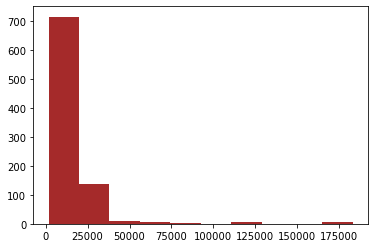

In [136]:
# First with per sqft.
plt.hist(new["Per_Sqft"],color='brown')

### There are more than 200 odd NULL values in Per_Sqft. I think the best way to fill them will be to fill them by the ratio of corresponding Price and Area

In [137]:
new['Per_Sqft']=new['Per_Sqft'].fillna(value=new['Price']/new['Area'] )

<ipython-input-137-67ed72085de1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['Per_Sqft']=new['Per_Sqft'].fillna(value=new['Price']/new['Area'] )


In [138]:
new.head(20)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0000,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,8125.0
1,750.0000,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0000,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0000,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0000,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
5,1300.0000,4,3.0,Semi-Furnished,Rohini Sector 24,1.0,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0
6,1350.0000,4,3.0,Semi-Furnished,Rohini Sector 24,1.0,10000000,Ready_to_move,Resale,Builder_Floor,6667.0
7,650.0000,2,2.0,Semi-Furnished,"Delhi Homes, Rohini Sector 24",1.0,4000000,Ready_to_move,New_Property,Apartment,6154.0
8,985.0000,3,3.0,Unfurnished,Rohini Sector 21,1.0,6800000,Almost_ready,New_Property,Builder_Floor,6154.0
9,1300.0000,4,4.0,Semi-Furnished,Rohini Sector 22,1.0,15000000,Ready_to_move,New_Property,Builder_Floor,6154.0


In [139]:
new.isnull().sum()

Area            0
BHK             0
Bathroom        1
Furnishing      5
Locality        0
Parking        30
Price           0
Status          0
Transaction     0
Type            5
Per_Sqft        0
dtype: int64

In [140]:
new[new['Bathroom'].isnull()]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
30,1500.0,1,NaN,Unfurnished,Lajpat Nagar 2,NaN,13500000,Ready_to_move,Resale,Apartment,9000.0


In [141]:
new['Bathroom']=new['Bathroom'].fillna(value=new['Bathroom'].median())

<ipython-input-141-4edcce43805d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['Bathroom']=new['Bathroom'].fillna(value=new['Bathroom'].median())


In [142]:
# Not needed to go with Float value to Bathroom.
new = new.astype({"Bathroom":'int64'}) 

In [143]:
new.isnull().sum()

Area            0
BHK             0
Bathroom        0
Furnishing      5
Locality        0
Parking        30
Price           0
Status          0
Transaction     0
Type            5
Per_Sqft        0
dtype: int64

In [144]:
new.isnull().sum()

Area            0
BHK             0
Bathroom        0
Furnishing      5
Locality        0
Parking        30
Price           0
Status          0
Transaction     0
Type            5
Per_Sqft        0
dtype: int64

In [145]:
new[new['Furnishing'].isnull()]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
509,450.0,2,2,NaN,"Gandhi Nagar, Shahdara",NaN,2900000,Ready_to_move,Resale,NaN,58000.0
510,540.0,5,2,NaN,"Gandhi Nagar, Shahdara",NaN,17000000,Ready_to_move,Resale,NaN,58000.0
511,1350.0,3,3,NaN,"Gandhi Nagar, Shahdara",NaN,25000000,Ready_to_move,Resale,NaN,18519.0
512,2250.0,3,2,NaN,"Gandhi Nagar, Shahdara",NaN,10000000,Ready_to_move,Resale,NaN,4444.0
719,1500.0,3,2,NaN,"Sarita Vihar, Mathura Road carpet area 1500 sq...",1.0,13500000,Ready_to_move,Resale,NaN,9000.0


In [146]:
new[new['Type'].isnull()]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
509,450.0,2,2,NaN,"Gandhi Nagar, Shahdara",NaN,2900000,Ready_to_move,Resale,NaN,58000.0
510,540.0,5,2,NaN,"Gandhi Nagar, Shahdara",NaN,17000000,Ready_to_move,Resale,NaN,58000.0
511,1350.0,3,3,NaN,"Gandhi Nagar, Shahdara",NaN,25000000,Ready_to_move,Resale,NaN,18519.0
512,2250.0,3,2,NaN,"Gandhi Nagar, Shahdara",NaN,10000000,Ready_to_move,Resale,NaN,4444.0
719,1500.0,3,2,NaN,"Sarita Vihar, Mathura Road carpet area 1500 sq...",1.0,13500000,Ready_to_move,Resale,NaN,9000.0


In [147]:
new['Furnishing'].value_counts()

Semi-Furnished    618
Unfurnished       315
Furnished         166
Name: Furnishing, dtype: int64

In [148]:
new['Type'].value_counts()

Builder_Floor    591
Apartment        508
Name: Type, dtype: int64

### Type Column is well distributed between Builder_Floor and Apartment. 


### Ok. We are filling it with that value of a room at the same locality.

In [149]:
#This will arrange the localities sequentially...

new=new.sort_values(by='Locality',axis=0)
new

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
222,2700.0,4,3,Semi-Furnished,"APL Builder Floor, Greater Kailash 1",1.0,60000000,Ready_to_move,New_Property,Builder_Floor,22222.000000
645,1850.0,3,2,Semi-Furnished,"Aashirwaad Chowk, Dwarka",1.0,15500000,Ready_to_move,Resale,Apartment,8378.378378
637,1550.0,3,2,Semi-Furnished,"Aashirwaad Chowk, Dwarka",1.0,13200000,Ready_to_move,Resale,Apartment,8516.129032
641,1470.0,3,2,Semi-Furnished,"Aashirwaad Chowk, Dwarka",1.0,14500000,Ready_to_move,Resale,Apartment,9863.945578
642,1500.0,3,2,Semi-Furnished,"Aashirwaad Chowk, Dwarka",1.0,14900000,Ready_to_move,Resale,Apartment,9933.333333
...,...,...,...,...,...,...,...,...,...,...,...
332,747.0,2,2,Furnished,"Yamuna Vihar, Shahdara",1.0,6500000,Ready_to_move,Resale,Builder_Floor,8701.000000
339,713.0,3,1,Unfurnished,"Yamuna Vihar, Shahdara",1.0,8000000,Ready_to_move,Resale,Apartment,11220.000000
355,700.0,2,1,Furnished,"Yamuna Vihar, Shahdara",2.0,16000000,Ready_to_move,New_Property,Builder_Floor,22857.000000
1010,540.0,2,1,Unfurnished,"Zakir Nagar, New Friends Colony",2.0,1500000,Ready_to_move,Resale,Builder_Floor,2778.000000


In [150]:
new['Type']=new['Type'].fillna(method='bfill')

In [151]:
new['Furnishing']=new['Furnishing'].fillna(method='bfill')

In [152]:
new.isnull().sum()

Area            0
BHK             0
Bathroom        0
Furnishing      0
Locality        0
Parking        30
Price           0
Status          0
Transaction     0
Type            0
Per_Sqft        0
dtype: int64

### Parking still have some NaNs. Lets first find if it has any significant role to play to predict price or not.¶

### For that correlation of various columns with Price(i.e the Output Column) is to be examined.

### But some columns are NOT Numerical.

## LABEL ENCODING:

### to convert Furnishing, Status, Transaction and Type into Numerical Data----<

In [153]:
furnishing_encoder=LabelEncoder()
status_encoder=LabelEncoder()
transaction_encoder=LabelEncoder()
type_encoder=LabelEncoder()

In [154]:
new['Furnishing']=furnishing_encoder.fit_transform(new['Furnishing'].astype('str'))
new['Status']=status_encoder.fit_transform(new['Status'])
new['Transaction']=transaction_encoder.fit_transform(new['Transaction'])
new['Type']=type_encoder.fit_transform(new['Type'].astype('str'))

In [155]:
new.head(10)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
222,2700.0,4,3,1,"APL Builder Floor, Greater Kailash 1",1.0,60000000,1,0,1,22222.000000
645,1850.0,3,2,1,"Aashirwaad Chowk, Dwarka",1.0,15500000,1,1,0,8378.378378
637,1550.0,3,2,1,"Aashirwaad Chowk, Dwarka",1.0,13200000,1,1,0,8516.129032
641,1470.0,3,2,1,"Aashirwaad Chowk, Dwarka",1.0,14500000,1,1,0,9863.945578
642,1500.0,3,2,1,"Aashirwaad Chowk, Dwarka",1.0,14900000,1,1,0,9933.333333
648,1380.0,3,2,1,"Aashirwaad Chowk, Dwarka",1.0,15000000,1,1,0,10869.565217
651,1700.0,3,3,1,"Aashirwaad Chowk, Dwarka",1.0,17200000,1,1,0,10117.647059
977,1450.0,3,3,1,"Abhimanyu Apartments, Vasundhara Enclave",1.0,11600000,1,1,0,9655.000000
965,1350.0,4,4,1,"Abhimanyu Apartments, Vasundhara Enclave",1.0,10500000,1,1,0,7777.777778
1003,35.0,3,2,1,"Abul Fazal Enclave Part 1, Okhla",2.0,4950000,1,1,0,19841.000000


In [156]:
new.corr()['Price']

Area           0.795794
BHK            0.601112
Bathroom       0.750205
Furnishing    -0.025317
Parking       -0.022254
Price          1.000000
Status        -0.098475
Transaction   -0.196361
Type           0.116256
Per_Sqft       0.290413
Name: Price, dtype: float64

<AxesSubplot:>

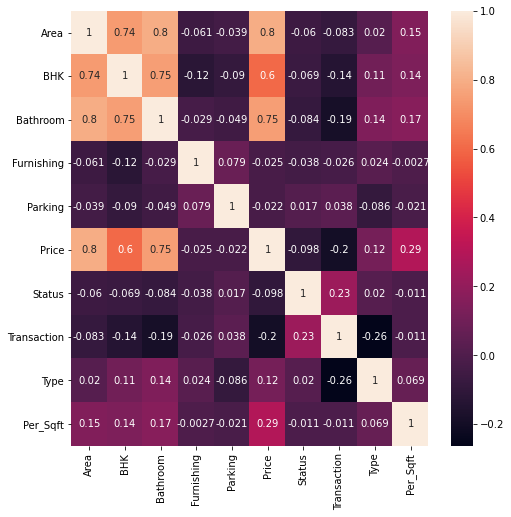

In [157]:
#heatmap to find the correlation
plt.figure(figsize=(8,8))
sns.heatmap(new.corr(),annot=True)


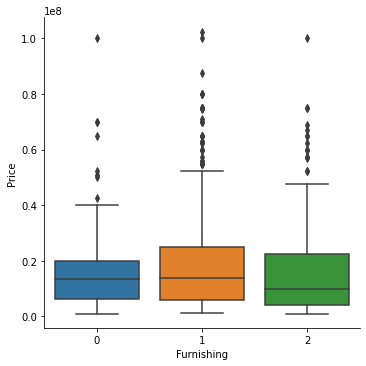

In [158]:
sns.catplot(x="Furnishing", y="Price", kind="box", data=new)

<AxesSubplot:xlabel='Furnishing', ylabel='Price'>

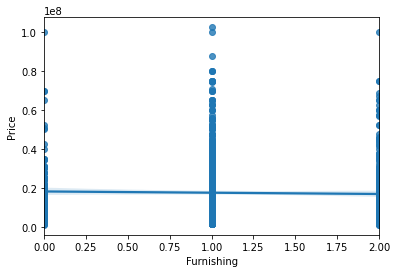

In [159]:
sns.regplot(x="Furnishing", y="Price", data=new)

In [160]:
new.isnull().sum()

Area            0
BHK             0
Bathroom        0
Furnishing      0
Locality        0
Parking        30
Price           0
Status          0
Transaction     0
Type            0
Per_Sqft        0
dtype: int64

## Well we can understand from both Correlation Chart and the above plot that Parking Column is Good for Nothing for Price-Prediction. "A correlation of 0.02 is nothing". So is with Furnishing.

### So these are dropped off along with Locality....

In [161]:
final= new.drop(columns=['Furnishing','Parking','Locality'])

In [162]:
final.shape
final

,Area,BHK,Bathroom,Price,Status,Transaction,Type,Per_Sqft
222,2700.0,4,3,60000000,1,0,1,22222.000000
645,1850.0,3,2,15500000,1,1,0,8378.378378
637,1550.0,3,2,13200000,1,1,0,8516.129032
641,1470.0,3,2,14500000,1,1,0,9863.945578
642,1500.0,3,2,14900000,1,1,0,9933.333333
...,...,...,...,...,...,...,...,...
332,747.0,2,2,6500000,1,1,1,8701.000000
339,713.0,3,1,8000000,1,1,0,11220.000000
355,700.0,2,1,16000000,1,0,1,22857.000000
1010,540.0,2,1,1500000,1,1,1,2778.000000


In [163]:
y=final['Price'].values
y

array([60000000, 15500000, 13200000, ..., 16000000,  1500000,  9000000],
      dtype=int64)

In [164]:
X=final.drop(columns=['Per_Sqft','Price'])
X

,Area,BHK,Bathroom,Status,Transaction,Type
222,2700.0,4,3,1,0,1
645,1850.0,3,2,1,1,0
637,1550.0,3,2,1,1,0
641,1470.0,3,2,1,1,0
642,1500.0,3,2,1,1,0
...,...,...,...,...,...,...
332,747.0,2,2,1,1,1
339,713.0,3,1,1,1,0
355,700.0,2,1,1,0,1
1010,540.0,2,1,1,1,1


In [165]:
print(X.shape)
print(y.shape)

(1104, 6)
(1104,)


In [168]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [169]:

print(model.feature_importances_)

[0.48485696 0.09281928 0.33457765 0.0129849  0.04587893 0.02888227]


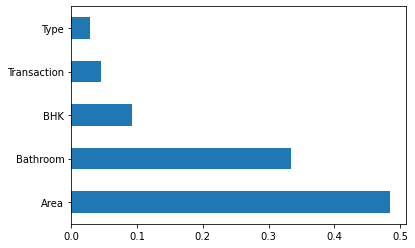

In [170]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

### Train Test Split:

In [171]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state =2)

In [172]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(883, 6)
(221, 6)
(883,)
(221,)


## Model Buliding

# 1. Linear Regression

In [173]:
# from sklearn.linear_model import LinearRegression
# lr=LinearRegression()

In [236]:
# lr.fit(X_train,y_train)


LinearRegression()

In [237]:
# lr_pred=lr.predict(X_test)

In [238]:
# lr_pred

array([46096550.17575119, 25218663.21997067,  2263003.79577686,
       39468151.74086517,  2001979.68699122, 15671177.39039974,
       12710385.32459034,  7427457.84412234, 14141396.78941144,
       16146946.6622858 ,  1959934.2946183 , 19316853.46051389,
       11293916.44869841,  9111419.91606649, 37514763.36355986,
       43456669.77314756,  8429093.90828374, 18318596.09608398,
        6337800.93641704, 18596736.97022088, 10314937.83502843,
       15484189.41031551, 52068169.23492344, 44326461.05227813,
        8599607.15864849, 19416407.21267194, 14310631.32610972,
       -3011236.87360322, 49576073.85702826, 15659063.42215295,
       21524161.48817163, 18003942.28911899,  7443333.03713967,
       25622127.75714062, 22315907.20300492, 19422995.05878696,
        2962700.34822964,  4963167.90040781,  5552622.48277443,
       42161547.04838806,  8762511.8546166 , -3966946.74071921,
       20307491.05207722, 55242152.33334146, 24236497.00718877,
        9748538.55404609,  7844753.94622

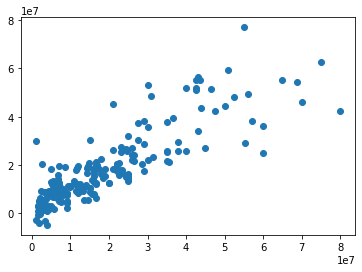

In [239]:
# plt.scatter(x=y_test, y=lr_pred)

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

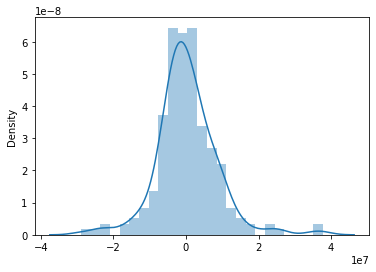

In [240]:
# sns.distplot(y_test- lr_pred)

In [241]:
# r2_score(y_test,lr_pred)

0.7313678268659131


# 2. KNeighbours (KNN)

In [242]:
# from sklearn.neighbors import KNeighborsRegressor
# knr=KNeighborsRegressor()

In [243]:
# knr.fit(X_train, y_train)

KNeighborsRegressor()

In [244]:
# y_pred2=knr.predict(X_test)

In [245]:
# y_pred2

array([30018000., 31100000.,  3780000., 35300000.,  2300000.,  9600000.,
       16920000.,  8996000.,  9700000., 20140000.,  2118000., 11780000.,
       10088000., 11682000., 25300000., 30920000.,  6140000., 16800000.,
        3020000., 17700000.,  9660000., 21100000., 44840000., 28540000.,
       11560000., 16100000., 20248000.,  2560000., 57900000., 20840000.,
       26240000., 20600000.,  8930000., 29900000., 16900000., 14260000.,
        7180000.,  1870000.,  1870000., 41700000.,  2580000.,  2580000.,
       25000000., 55700000., 24900000.,  5658000., 22700000., 10000000.,
       14940000.,  2970000.,  4760000., 43600000.,  9228000., 13420000.,
       14540000., 20340000., 22040000.,  4900000.,  9160000.,  3300000.,
        2020000., 11900000.,  7200000.,  6030000., 11680000., 10850000.,
       15940000., 18500000.,  4760000.,  2650000., 32900000., 62500000.,
        5780000., 25700000., 16500000., 73900000., 11680000., 39800000.,
        7400000.,  7380000., 13800000., 57100000., 

In [246]:
# r2_score(y_test,y_pred2)

0.7560797506027451

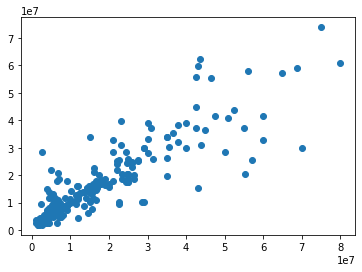

In [247]:
# plt.scatter(y_test, y_pred2)

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

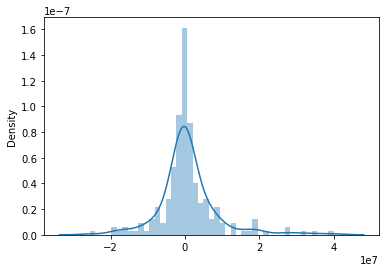

In [248]:
# sns.distplot(y_test-y_pred2)

### KNN Score around 75 percent.

# 3. Decession Tree Regressor

In [249]:
# from sklearn.tree import DecisionTreeRegressor

In [250]:
# dtr = DecisionTreeRegressor(random_state=0)

In [251]:
# dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [252]:
# y_pred4=dtr.predict(X_test)

In [253]:
# y_pred4

array([20000000., 24000000.,  5000000., 37500000.,  2200000., 15000000.,
       20000000.,  8770000.,  9000000.,  5510000.,  2200000.,  8400000.,
        2800000.,  8910000., 52500000., 42500000.,  6900000., 15800000.,
        3500000., 19200000., 24000000.,  1600000., 42500000., 70000000.,
       10700000., 12000000., 24000000.,  2000000., 70000000., 12500000.,
       37500000., 21000000.,  8550000., 22500000., 18800000., 14200000.,
        4700000.,  2000000.,  2200000., 46000000.,  3000000.,  3800000.,
       22000000., 42500000., 29500000., 13500000., 16000000.,  6800000.,
        6200000.,  2900000., 17000000., 43200000.,  6900000., 13500000.,
       17000000., 12000000.,  4400000.,  5700000.,  3800000.,  5600000.,
        1500000., 18000000.,  6200000.,  6000000., 13400000., 11000000.,
       23000000., 14000000.,  3800000.,  1900000., 37500000., 67000000.,
        3000000., 25500000., 16200000., 75000000., 14000000., 50000000.,
        4500000.,  4500000.,  8500000., 87500000., 

In [254]:
# r2_score(y_test,y_pred4)

0.6102565520961222

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

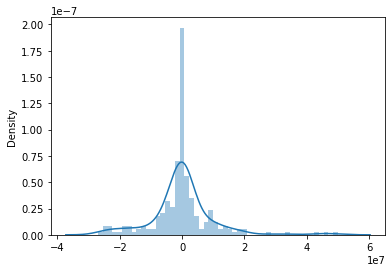

In [255]:
# sns.distplot(y_test-y_pred4)

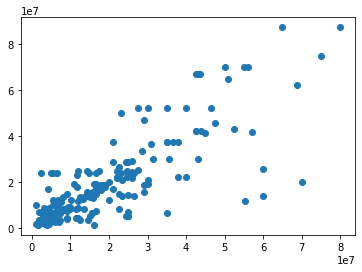

In [256]:
# plt.scatter(y_test, y_pred4)

### Decession Tree Regressor Score around 61 percent

## 4. Random Forest.

In [174]:

rf= RandomForestRegressor()

In [175]:
#hyperparameter tunning
n_estimators = [int(x) for x in np.linspace(start = 100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [176]:
# Randomize Search CV
# no. of tree in random forest
n_estimators = [int(x) for x in np.linspace(start = 100,stop=1200,num=12)]

#No. of feature to consider at every split
max_features = ['auto', 'sqrt']

#max_depth.append(None)
#Maximum no. of level in tree
max_depth =[int(x) for x in np.linspace(5,30,num=6)]

#Minimum no. of sample required to spilt a node
min_samples_split = [2,5,10,15,100]

#Minimum no. of sample required at each leaf node
min_samples_leaf = [1,2,5,10]

In [178]:
# Create the random grid
random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [179]:
# Use random grid to search the best hyperparameter
#create the base model
rf= RandomForestRegressor()

In [180]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter= 10, cv = 5, verbose =2 ,random_state =42,n_jobs =1) 

In [181]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [189]:
prediction = rf_random.predict(X_test)

In [190]:
prediction

array([47377742.17618115, 27121808.60170342,  4968313.53579226,
       33289702.38045051,  2839930.38316948,  8694185.07084474,
       15014345.17053867,  6706630.63953835, 13894438.70341419,
       16449960.12800168,  2962650.91077955, 17048876.88746221,
        9138295.27172747,  8386997.87354071, 34428380.69079998,
       35833220.25453451,  8203122.72320974, 17247105.35177056,
        3390804.14073341, 20122279.93778355,  7592681.63986444,
        9466925.70243386, 44763408.70918898, 39117942.06316159,
       11225838.86187472, 18421197.03748743, 13727729.49454245,
        3647687.19249636, 53139108.58563967, 15039639.09685546,
       19650291.79324114, 17139348.8719227 ,  8918547.07869909,
       27122817.99856286, 20103079.94366401, 18444139.22510464,
        5475772.75312879,  2413398.40173334,  2399961.89637879,
       42805759.50466035,  5907137.33427968,  3799661.35749987,
       20046103.8783787 , 50080684.80401416, 24017158.25009907,
        9471846.94043685, 15157190.05155

C:\Users\Karan Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

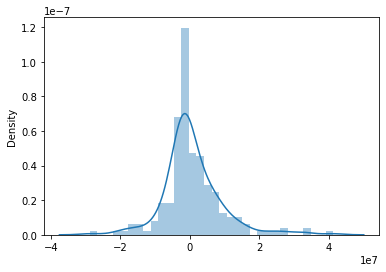

In [191]:
#for comparision 
sns.distplot(y_test-prediction)

### The graph look like a normal distribution which means model given a very good result

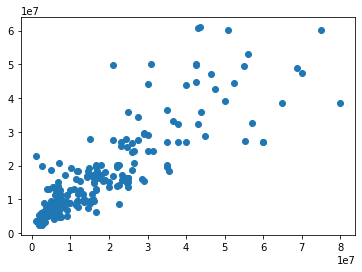

In [192]:
plt.scatter(y_test, prediction)

In [186]:
r2_score(y_test,rf_prediction)

0.7191785330827107

In [196]:
rf_random.best_score_

-77979190220064.16

# The best model seems to be Random forest Regressor with 72% score.

In [195]:
import pickle
#open a file where data will be stored
file = open('random_forest_regression_model.pkl','wb')

#dump the information into that file
pickle.dump(rf_random, file)